In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

In [11]:
events = pd.read_csv("timeseries_events.csv")

In [12]:
users  = pd.read_csv("timeseries_users.csv")

In [16]:
events = events.drop_duplicates()
users  = users.drop_duplicates()

In [17]:
events.head()

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [18]:
users.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [28]:
df_events_users = pd.merge(events, users, how='left', on=['user_id'])
df_events_users.head()

,user_id,event_date,age,gender
0,0,2015-02-26 00:00:00,51.0,f
1,0,2015-03-10 00:00:00,51.0,f
2,0,2015-03-30 00:00:00,51.0,f
3,0,2015-02-15 00:00:00,51.0,f
4,0,2015-02-18 00:00:00,51.0,f


In [29]:
df_events_users.dropna(inplace=True)
df_events_users.shape

(12003, 4)

In [30]:
df_events_users = df_events_users[(df_events_users.age >= 20) & (df_events_users['gender']=='m')]

In [37]:
df_events_users.shape

(3660, 4)

Text(0, 0.5, 'events num')

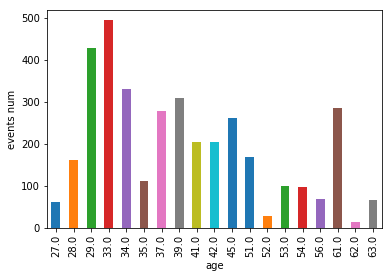

In [40]:
df_events_users.groupby('age')['event_date'].count().plot.bar()
plt.xlabel('age')
plt.ylabel('events num')

In [43]:
df_users_count_event=df_events_users.copy()
df_users_count_event['user_count_event'] = df_users_count_event.groupby('event_date')['user_id'].transform('count')
df_users_count_event.head()

,user_id,event_date,age,gender,user_count_event
513,2,2015-03-06 00:00:00,35.0,m,21
514,2,2015-03-19 00:00:00,35.0,m,24
515,2,2015-03-15 00:00:00,35.0,m,21
516,2,2015-02-27 00:00:00,35.0,m,21
517,2,2015-02-26 00:00:00,35.0,m,21


In [44]:
df_users_count_event = df_users_count_event[['user_id','user_count_event']]
df_users_count_event.head()

,user_id,user_count_event
513,2,21
514,2,24
515,2,21
516,2,21
517,2,21


In [46]:
df_users_count_event.rename(columns = {'user_id': 'id'}, inplace = True)
df_users_count_event.head()

,id,user_count_event
513,2,21
514,2,24
515,2,21
516,2,21
517,2,21


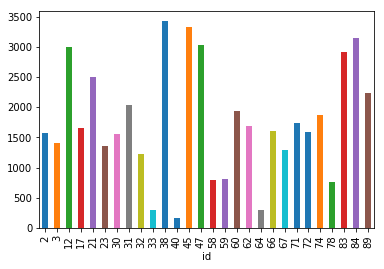

In [51]:
df_users_count_event.groupby('id')['user_count_event'].sum().plot.bar()

In [54]:
df_users_count_event['sum'] = df_users_count_event.groupby('id')['user_count_event'].transform('sum')
df_users_count_event.head()

,id,user_count_event,sum
513,2,21,1577
514,2,24,1577
515,2,21,1577
516,2,21,1577
517,2,21,1577


In [66]:
deaths = pd.read_csv("TABLE_III._Deaths_in_122_U.S._cities.csv")
deaths.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), ≥65","All causes, by age (years), ≥65, flag","All causes, by age (years), 45–64","All causes, by age (years), 45–64, flag","All causes, by age (years), 25–44","All causes, by age (years), 25–44, flag","All causes, by age (years), 1–24","All causes, by age (years), 1–24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I† Total,"P&I† Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [67]:
deaths.rename(inplace=True, columns = {'Reporting Area' : 'region', 'MMWR YEAR':'YEAR'})
deaths.head()

,region,YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), ≥65","All causes, by age (years), ≥65, flag","All causes, by age (years), 45–64","All causes, by age (years), 45–64, flag","All causes, by age (years), 25–44","All causes, by age (years), 25–44, flag","All causes, by age (years), 1–24","All causes, by age (years), 1–24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I† Total,"P&I† Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [69]:
deaths = deaths[deaths.columns.drop(list(deaths.filter(regex='flag')))]
deaths.head()

,region,"All causes, by age (years), All Ages**","All causes, by age (years), ≥65","All causes, by age (years), 45–64","All causes, by age (years), 25–44","All causes, by age (years), 1–24","All causes, by age (years), LT 1",P&I† Total,Location 1,Location 2
0,New England,600.0,426.0,125.0,28.0,12.0,9.0,47.0,NaN,NaN
1,Mid. Atlantic,807.0,563.0,181.0,32.0,13.0,18.0,32.0,NaN,NaN
2,E.N. Central,2468.0,1611.0,594.0,167.0,62.0,34.0,159.0,NaN,NaN
3,W.N. Central,634.0,432.0,150.0,31.0,9.0,11.0,37.0,NaN,NaN
4,S. Atlantic,1402.0,893.0,343.0,92.0,32.0,41.0,88.0,NaN,NaN


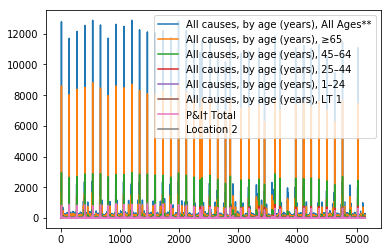

In [70]:
deaths.plot()

In [81]:
region = deaths.loc[0:8, 'region'].tolist()
region
deaths.shape

(5148, 10)

In [83]:
deaths = deaths[deaths['region'].isin(region)]
deaths.shape


(351, 10)